___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! 

## Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [28]:
df=pd.read_csv("Ecommerce Customers")

**Reading first 5 rows of a dataset**

In [29]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


**Summary of Dataset**

In [30]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Finding null values in the dataset**

In [32]:
df.isnull().sum() # checking total null values in a field

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

## Exploratory Data Analysis



**Relation of each field with each other in the dataset**

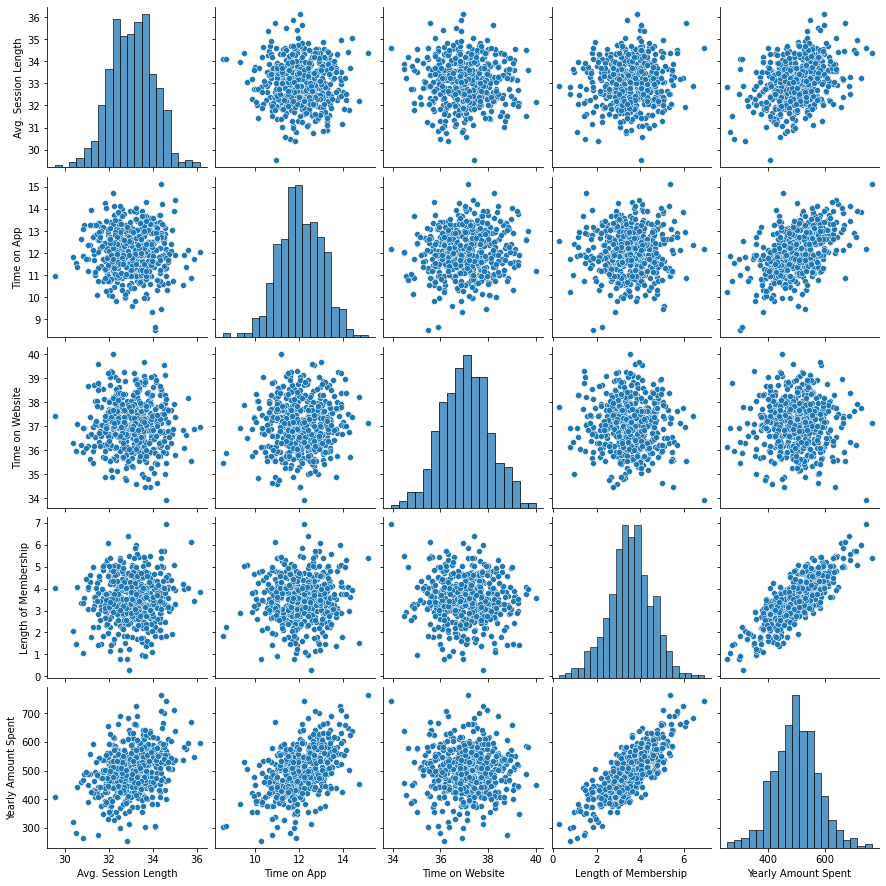

In [7]:
sns.pairplot(df)

**Cleaning dataset with boxplot**

<AxesSubplot:xlabel='Avg. Session Length'>

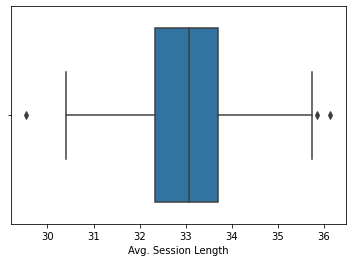

In [33]:
sns.boxplot(x=df["Avg. Session Length"])

In [34]:
q=df['Avg. Session Length'].quantile(0.99)
q1=df['Avg. Session Length'].quantile(0.01)
df1=df[df['Avg. Session Length']<q]
df1=df1[df1['Avg. Session Length']>q1]

<AxesSubplot:xlabel='Avg. Session Length'>

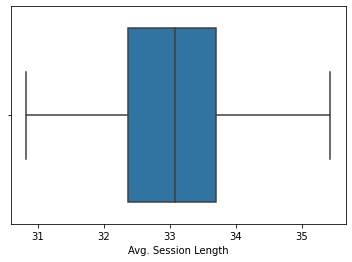

In [35]:
sns.boxplot(x=df1["Avg. Session Length"])

<AxesSubplot:xlabel='Time on App'>

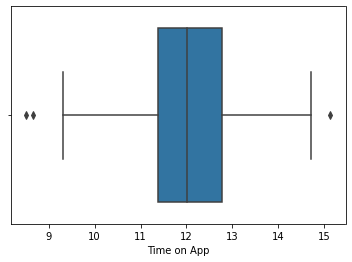

In [36]:
sns.boxplot(x=df1["Time on App"])

<AxesSubplot:xlabel='Time on Website'>

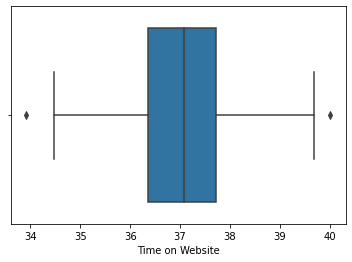

In [37]:
sns.boxplot(x=df1['Time on Website'])

In [38]:
q=df['Time on Website'].quantile(0.99)
q1=df['Time on Website'].quantile(0.01)
df2=df1[df1['Time on Website']<q]
df2=df2[df2['Time on Website']>q1]

<AxesSubplot:xlabel='Time on Website'>

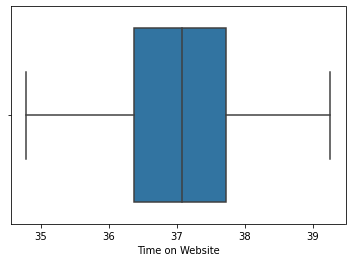

In [39]:
sns.boxplot(x=df2['Time on Website'])

<AxesSubplot:xlabel='Length of Membership'>

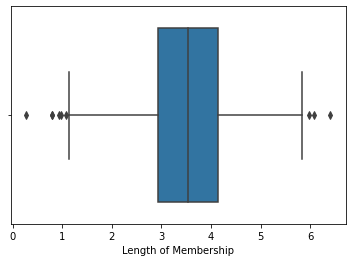

In [40]:
sns.boxplot(x=df2['Length of Membership'])

In [41]:
q=df['Length of Membership'].quantile(0.99)
q1=df['Length of Membership'].quantile(0.01)
df3=df2[df2['Length of Membership']<5.8]
df3=df3[df3['Length of Membership']>1.3]

<AxesSubplot:xlabel='Length of Membership'>

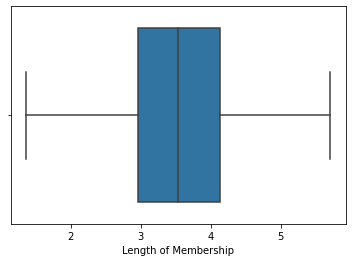

In [42]:
sns.boxplot(x=df3['Length of Membership'])

<AxesSubplot:xlabel='Yearly Amount Spent'>

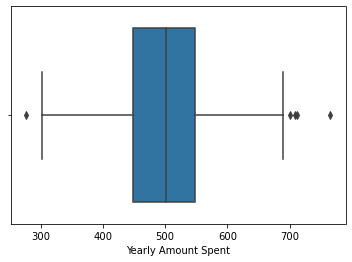

In [43]:
sns.boxplot(x=df3['Yearly Amount Spent'])

In [44]:
q=df['Yearly Amount Spent'].quantile(0.99)
q1=df['Yearly Amount Spent'].quantile(0.01)
df4=df3[df3['Yearly Amount Spent']<700]
df4=df4[df4['Yearly Amount Spent']>q1]

<AxesSubplot:xlabel='Yearly Amount Spent'>

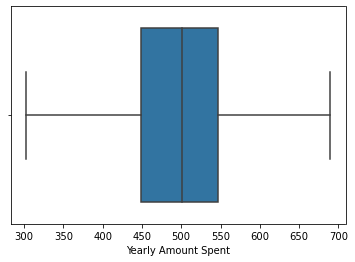

In [45]:
sns.boxplot(x=df4['Yearly Amount Spent'])


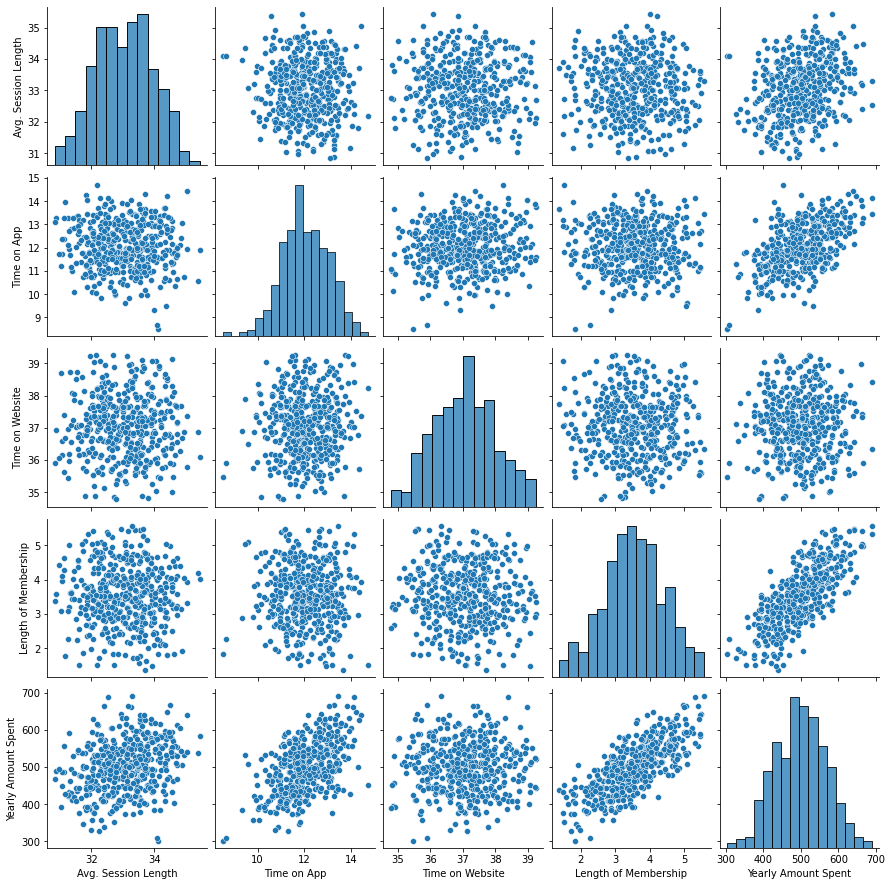

In [21]:
sns.pairplot(df4)

## OLS Assumptions

**checking linear relation between target and input features dataset**

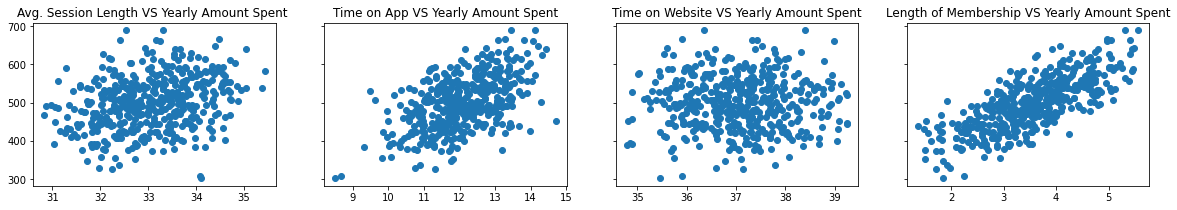

In [46]:
f, (ax1, ax2, ax3,ax4) = plt.subplots(1, 4, sharey=True, figsize =(20,3)) #sharey -> share 'Price' as y
ax1.scatter(df4['Avg. Session Length'],df4['Yearly Amount Spent'])
ax1.set_title('Avg. Session Length VS Yearly Amount Spent ')
ax2.scatter(df4['Time on App'],df4['Yearly Amount Spent'])
ax2.set_title('Time on App VS Yearly Amount Spent')
ax3.scatter(df4['Time on Website'],df4['Yearly Amount Spent'])
ax3.set_title('Time on Website VS Yearly Amount Spent')
ax4.scatter(df4['Length of Membership'],df4['Yearly Amount Spent'])
ax4.set_title('Length of Membership VS Yearly Amount Spent')

plt.show()

**Checking Multi collinearity**

<AxesSubplot:>

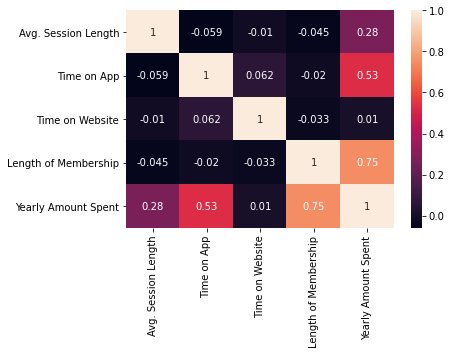

In [47]:
sns.heatmap(df4.corr(),annot=True)

In [48]:
df4.drop(['Email','Address','Avatar'],axis=1,inplace=True)


In [49]:
df4.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
6,32.021596,11.366348,36.683776,4.685017,521.572175


In [50]:
df4.columns.values

array(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'], dtype=object)

**Target and input variables**

In [51]:
input1=df4.drop('Yearly Amount Spent',axis=1)
target=df4['Yearly Amount Spent']

**Standardization**

In [52]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (calculate the mean and standard deviation feature-wise)
scaler.fit(input1)

StandardScaler()

In [53]:
# Scale the features and store them in a new variable (the actual scaling procedure)
inputs_scaled = scaler.transform(input1)

## Training and Testing Data




In [54]:
import sklearn.model_selection as ss
x_train,x_test,y_train,y_test=ss.train_test_split(inputs_scaled ,target,test_size=0.3, random_state=365)

## Training the Model

Now its time to train our model on our training data!

In [55]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Fit the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)

LinearRegression()

In [56]:
# Let's check the outputs of the regression
# I'll store them in y_hat as this is the 'theoretical' name of the predictions
y_hat = reg.predict(x_train)

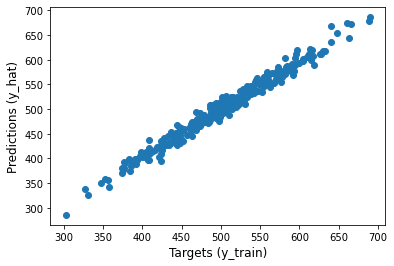

In [57]:
# The simplest way to compare the targets (y_train) and the predictions (y_hat) is to plot them on a scatter plot
plt.scatter(y_train, y_hat)
# Let's also name the axes
plt.xlabel('Targets (y_train)',size=12)
plt.ylabel('Predictions (y_hat)',size=12)


plt.show()

C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

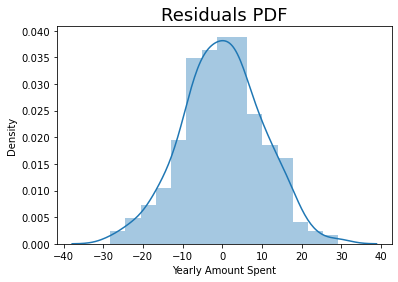

In [58]:
sns.distplot(y_train - y_hat)
# Include a title
plt.title("Residuals PDF", size=18)

**R^2 Square score**

In [59]:
reg.score(x_train,y_train)

0.9784219012265848

In [60]:
reg.intercept_

500.3640346423078

**Feature selection**

In [61]:
from sklearn.feature_selection import f_regression
p_value=f_regression(x_train,y_train)[1]
p_value.round(3)

# this shows that 'Time on Website' is insignificant and should be remove from inputs

array([0.   , 0.   , 0.859, 0.   ])

In [62]:
reg_summary = pd.DataFrame(input1.columns, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary['p-values'] = p_value.round(3)
reg_summary

,Features,Weights,p-values
0,Avg. Session Length,23.869465,0.000
1,Time on App,38.472664,0.000
2,Time on Website,0.555866,0.859
3,Length of Membership,53.520991,0.000


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!


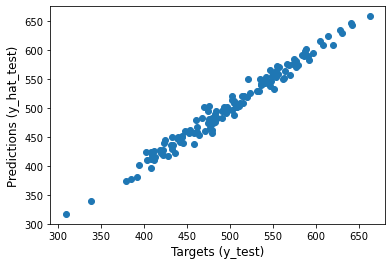

In [63]:
y_hat_test = reg.predict(x_test)
plt.scatter(y_test, y_hat_test)
plt.xlabel('Targets (y_test)',size=12)
plt.ylabel('Predictions (y_hat_test)',size=12)

plt.show()

## Residuals



C:\Users\Ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residuals PDF')

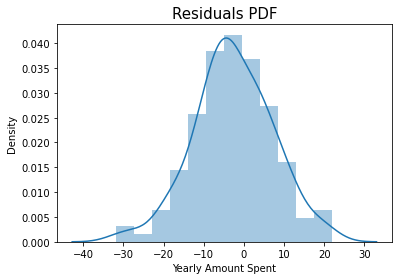

In [64]:
sns.distplot(y_test - y_hat_test)
# Include a title
plt.title("Residuals PDF", size=15)

## Evaluating the Model

Evaluate our model performance by calculating the residual sum of squares


In [65]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_hat_test))
print('MSE:', metrics.mean_squared_error(y_test, y_hat_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

MAE: 8.050733192526147
MSE: 102.75495653118607
RMSE: 10.136811951061638


In [66]:
reg_summary = pd.DataFrame(input1.columns, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary['p-values'] = p_value.round(3)
reg_summary

,Features,Weights,p-values
0,Avg. Session Length,23.869465,0.000
1,Time on App,38.472664,0.000
2,Time on Website,0.555866,0.859
3,Length of Membership,53.520991,0.000


## Conclusion


**Coefficient of 'Time on Website' = 0.555**


**Coefficient of 'Time on App' = 38.472664**

**'Time on Website' doesn't make significant changes to the target function i.e 'Yearly amount spent'**


***Hence the company need to focus their efforts on their mobile app experience***